In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import joblib
import os
import random
from termcolor import colored

In [2]:
!pwd

/home/bob/code/marcin-sobocinski/mlchartist/notebooks/companies_clusters


====================================================================================================

**Goal : gather similar companies according to their features and number of trading days**

**Use : provide coherent and meaningful data to model**


**(_Ideal_ : develop tailored model to each type of groups)**



**_See Notebook `Table of content` for good understanding about what this notebook is doing when ran_**

====================================================================================================

# Anaysis of Companies Age from `nasdaq_us_stats.xls`

In [3]:
#!!!Path might not be the same!!!

meta_df = pd.read_csv('../../raw_data/metadata/nasdaq_us_stats.xls')

In [4]:
meta_df.head()

,Unnamed: 0,stock,days,min_close,max_close,start_date,end_date
0,0,AACG.US,3165,0.21703,3.850,2008-01-28,2021-01-25
1,1,AACQ.US,96,9.62000,11.070,2020-09-08,2021-01-25
2,2,AACQU.US,134,10.00000,11.900,2020-07-15,2021-01-25
3,3,AACQW.US,95,1.07500,2.580,2020-09-09,2021-01-25
4,4,AAL.US,1793,9.04000,56.989,2013-12-10,2021-01-25


In [5]:
meta_df.describe()

,Unnamed: 0,days,min_close,max_close
count,3921.000000,3921.000000,3921.000000,3.921000e+03
mean,1960.000000,1876.186942,8.257047,6.181576e+06
std,1132.039531,1795.084440,16.268917,3.863434e+08
min,0.000000,1.000000,0.001000,2.400000e-01
25%,980.000000,312.000000,1.490000,1.438700e+01
50%,1960.000000,1286.000000,5.010000,2.880000e+01
75%,2940.000000,3775.000000,10.384000,6.533000e+01
max,3920.000000,12879.000000,647.290000,2.419200e+10


In [6]:
meta_df = meta_df[['stock', 'days', 'min_close', 'max_close']]

## Company age classification

In [7]:
meta_df['range_price'] = meta_df['max_close'] - meta_df['min_close']
meta_df['years'] = meta_df['days']/365

In [8]:
clean_meta_df = meta_df[['stock', 'years', 'range_price']]

<AxesSubplot:xlabel='years', ylabel='Count'>

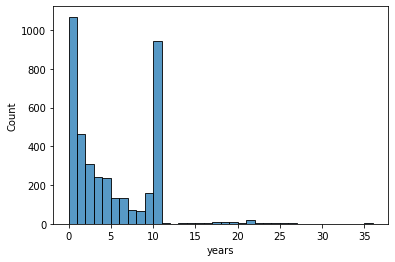

In [9]:
sns.histplot(clean_meta_df['years'], binwidth=1)

👆👆**Anomaly at less than 1 year and 10 year old companies**👆👆

In [10]:
bins = [0, 1, 5, 10, 15, 20, 25, 30, 40]

clean_meta_df['company_vintage'] = pd.cut(meta_df['years'].copy(), 
                                          bins)                            # A company aged of 1Y and one day is
                                          #labels=['(0, 1]','(1, 5]',       # part of the '(1, 5]' class
                                          #        '(5, 10]', '(10, 15]',
                                          #        '(15, 20]', '(20, 25]',
                                          #        '(25, 30]', '(30, 40]'])
print(clean_meta_df['company_vintage'])

0        (5, 10]
1         (0, 1]
2         (0, 1]
3         (0, 1]
4         (1, 5]
5        (5, 10]
6        (5, 10]
7       (10, 15]
8       (25, 30]
9       (10, 15]
10      (10, 15]
11      (10, 15]
12        (0, 1]
13        (0, 1]
14        (1, 5]
15      (10, 15]
16      (10, 15]
17        (0, 1]
18        (0, 1]
19        (1, 5]
20       (5, 10]
21        (0, 1]
22        (0, 1]
23        (0, 1]
24      (10, 15]
25        (0, 1]
26        (0, 1]
27        (0, 1]
28        (1, 5]
29        (0, 1]
          ...   
3891     (5, 10]
3892     (5, 10]
3893      (0, 1]
3894      (0, 1]
3895      (0, 1]
3896      (0, 1]
3897      (0, 1]
3898      (1, 5]
3899    (20, 25]
3900      (1, 5]
3901      (0, 1]
3902      (0, 1]
3903      (0, 1]
3904    (10, 15]
3905    (10, 15]
3906      (1, 5]
3907      (1, 5]
3908      (1, 5]
3909     (5, 10]
3910      (0, 1]
3911      (0, 1]
3912      (0, 1]
3913      (0, 1]
3914      (1, 5]
3915      (1, 5]
3916    (10, 15]
3917     (5, 10]
3918      (1, 

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
clean_meta_df['company_vintage'].apply(str)
print(clean_meta_df.info())
clean_meta_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 4 columns):
stock              3921 non-null object
years              3921 non-null float64
range_price        3921 non-null float64
company_vintage    3921 non-null category
dtypes: category(1), float64(2), object(1)
memory usage: 95.9+ KB
None


,stock,years,range_price,company_vintage
0,AACG.US,8.671233,3.63297,"(5, 10]"
1,AACQ.US,0.263014,1.45000,"(0, 1]"
2,AACQU.US,0.367123,1.90000,"(0, 1]"
3,AACQW.US,0.260274,1.50500,"(0, 1]"
4,AAL.US,4.912329,47.94900,"(1, 5]"


## Classification Results

<AxesSubplot:xlabel='years', ylabel='Count'>

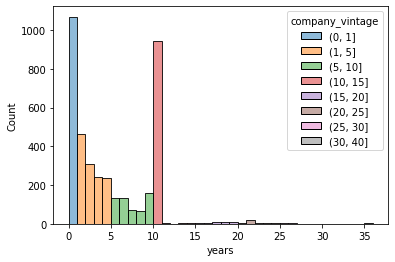

In [12]:
sns.histplot(data=clean_meta_df, x='years', binwidth=1, hue='company_vintage')
#plt.savefig('companies_age_classification.pdf', dpi=1200)

In [13]:
clean_meta_df.groupby('company_vintage')['stock'].count()

company_vintage
(0, 1]      1069
(1, 5]      1252
(5, 10]      564
(10, 15]     950
(15, 20]      32
(20, 25]      37
(25, 30]      13
(30, 40]       4
Name: stock, dtype: int64

### Saving List of Companies Name via `joblib`

In [14]:
stocks_bin_1 = []
stocks_bin_2 = []
stocks_bin_3 = []
stocks_bin_4 = []
stocks_bin_5 = []
stocks_bin_6 = []
stocks_bin_7 = []
stocks_bin_8 = []

for idx, row in clean_meta_df.iterrows():
    x = row['years']                                            # <=> ['days']/365
    st = row['stock'].replace('.US', '')
    
    #print(idx, x, row['stock'])
    if x <= 1 : stocks_bin_1.append(st)
    elif x > 1 and x <= 5: stocks_bin_2.append(st)
    elif x > 5 and x <= 10: stocks_bin_3.append(st)
    elif x > 10 and x <= 15: stocks_bin_4.append(st)        
    elif x > 15 and x <= 20: stocks_bin_5.append(st)        
    elif x > 20 and x <= 25: stocks_bin_6.append(st)        
    elif x > 25 and x <= 30: stocks_bin_7.append(st)        
    elif x > 30: stocks_bin_8.append(st)
    
print(f"Number of companies with less than a year of history: {len(stocks_bin_1)}")
print(f"Number of companies with between a year and 5 years of history: {len(stocks_bin_2)}")    
print(f"Number of companies with between 5 years and 10 years of history: {len(stocks_bin_3)}")
print(f"Number of companies with between 10 years and 15 years of history: {len(stocks_bin_4)}")
print(f"Number of companies with between 15 years and 20 years of history: {len(stocks_bin_5)}")
print(f"Number of companies with between 20 years and 25 years of history: {len(stocks_bin_6)}")
print(f"Number of companies with between 25 years and 30 years of history: {len(stocks_bin_7)}")
print(f"Number of companies with more than 30 years of history: {len(stocks_bin_8)}")

stock_bins = [stocks_bin_1, stocks_bin_2, stocks_bin_3,
              stocks_bin_4, stocks_bin_5, stocks_bin_6,
              stocks_bin_7, stocks_bin_8]

Number of companies with less than a year of history: 1069
Number of companies with between a year and 5 years of history: 1252
Number of companies with between 5 years and 10 years of history: 564
Number of companies with between 10 years and 15 years of history: 950
Number of companies with between 15 years and 20 years of history: 32
Number of companies with between 20 years and 25 years of history: 37
Number of companies with between 25 years and 30 years of history: 13
Number of companies with more than 30 years of history: 4


In [15]:
stock_bins

[['AACQ',
  'AACQU',
  'AACQW',
  'ABCL',
  'ABCM',
  'ABNB',
  'ABST',
  'ACAC',
  'ACACU',
  'ACACW',
  'ACAM',
  'ACAMU',
  'ACAMW',
  'ACCD',
  'ACEV',
  'ACEVU',
  'ACEVW',
  'ACKIU',
  'ACTC',
  'ACTCU',
  'ACTCW',
  'ADERU',
  'ADILW',
  'ADOC',
  'ADOCR',
  'ADOCU',
  'ADOCW',
  'ADTX',
  'ADV',
  'ADVWW',
  'ADXN',
  'AEACU',
  'AEPPZ',
  'AFBI',
  'AFIB',
  'AFINO',
  'AFRM',
  'AGBA',
  'AGBAR',
  'AGBAU',
  'AGBAW',
  'AGC',
  'AGCUU',
  'AGCWW',
  'AGNCO',
  'AGNCP',
  'AHAC',
  'AHACU',
  'AHACW',
  'AIH',
  'AIRTP',
  'AIRTW',
  'AKICU',
  'AKU',
  'AKUS',
  'ALAC',
  'ALACR',
  'ALACU',
  'ALGM',
  'ALGS',
  'ALRS',
  'ALTUU',
  'ALVR',
  'ALXO',
  'AMCIU',
  'AMCIW',
  'AMHC',
  'AMHCU',
  'AMHCW',
  'AMST',
  'AMTI',
  'AMYT',
  'ANDA',
  'ANDAR',
  'ANDAU',
  'ANDAW',
  'ANNX',
  'ANPC',
  'AOUT',
  'API',
  'APRE',
  'APXT',
  'APXTU',
  'APXTW',
  'ARBG',
  'ARBGU',
  'ARBGW',
  'ARKO',
  'ARKOW',
  'ARQT',
  'ARRY',
  'ARTLW',
  'ARYA',
  'ASLE',
  'ASLEW',
  'ASO

❗❗❗**You should check the path you want to save the `stock_bins` list**❗❗❗

(The `metadata` directory is where I saved the `nasdaq_us_stats.xls` csv file of Ian)

In [16]:
joblib.dump(stock_bins, '../../raw_data/metadata/tickers_per_history_lenght__list')

['../../raw_data/metadata/tickers_per_history_lenght__list']

In [17]:
stocks_tickers = joblib.load('../../raw_data/metadata/tickers_per_history_lenght__list')
stocks_tickers

[['AACQ',
  'AACQU',
  'AACQW',
  'ABCL',
  'ABCM',
  'ABNB',
  'ABST',
  'ACAC',
  'ACACU',
  'ACACW',
  'ACAM',
  'ACAMU',
  'ACAMW',
  'ACCD',
  'ACEV',
  'ACEVU',
  'ACEVW',
  'ACKIU',
  'ACTC',
  'ACTCU',
  'ACTCW',
  'ADERU',
  'ADILW',
  'ADOC',
  'ADOCR',
  'ADOCU',
  'ADOCW',
  'ADTX',
  'ADV',
  'ADVWW',
  'ADXN',
  'AEACU',
  'AEPPZ',
  'AFBI',
  'AFIB',
  'AFINO',
  'AFRM',
  'AGBA',
  'AGBAR',
  'AGBAU',
  'AGBAW',
  'AGC',
  'AGCUU',
  'AGCWW',
  'AGNCO',
  'AGNCP',
  'AHAC',
  'AHACU',
  'AHACW',
  'AIH',
  'AIRTP',
  'AIRTW',
  'AKICU',
  'AKU',
  'AKUS',
  'ALAC',
  'ALACR',
  'ALACU',
  'ALGM',
  'ALGS',
  'ALRS',
  'ALTUU',
  'ALVR',
  'ALXO',
  'AMCIU',
  'AMCIW',
  'AMHC',
  'AMHCU',
  'AMHCW',
  'AMST',
  'AMTI',
  'AMYT',
  'ANDA',
  'ANDAR',
  'ANDAU',
  'ANDAW',
  'ANNX',
  'ANPC',
  'AOUT',
  'API',
  'APRE',
  'APXT',
  'APXTU',
  'APXTW',
  'ARBG',
  'ARBGU',
  'ARBGW',
  'ARKO',
  'ARKOW',
  'ARQT',
  'ARRY',
  'ARTLW',
  'ARYA',
  'ASLE',
  'ASLEW',
  'ASO

# Modeling Companies per Vintage - (0, 1] - The youngest ones

## Functions definitions & Imports

### `precise_stocks_selector_local()`

In [18]:
from termcolor import colored

def precise_stocks_selector_local(tickers_list=[], path_files='../../raw_data/processed/',
                                  random_sample=False, num_samp = 2, verbose=1):
    """
    Returns a concatened DataFrame of the stocks data which tickers' list were passed
    
    If random_sample = True, return a DataFrame with random sample of stocks from the tickers' list passed
    
    Example:
    INPUT: ['AEP', 'GT', 'INTC', 'PEP']
    OUTPUT: df.tickers.unique() ==> ['GT', 'INTC']
   
    """
    
    if verbose == 2:
        print(colored(tickers_list, 'yellow'))
        
    t = []
    for ticker in tickers_list:
        ticker = f"{ticker}.csv".lower()
        t.append(ticker)
    tickers_list = t
    
    if verbose == 2:
        print(colored(tickers_list, 'yellow'))
        print()
        print()
    
    if verbose >= 1:
        print(colored(f"****** Starting browsing the '{path_files}' directory ******", 'magenta'))
        
    filenames = []
    missing_stock_csv = []

    
    if random_sample:
        for file in os.listdir(path_files):
            if file.endswith('.csv'):
                if file in tickers_list:
                    filenames.append(file)
        
        for ticker in tickers_list:
            #print(ticker)
            #print(missing_stock_csv)
            if ticker not in filenames:
                missing_stock_csv.append(ticker)
                print(colored(f"{ticker} missing", 'red'))
            else:
                pass
        
        #print(missing_stock_csv)
        
        for missed in missing_stock_csv:
            if missed not in tickers_list:
                missing_stock_csv.remove(missed)
        #print(missing_stock_csv)
        
        if len(filenames) < num_samp:
            print(colored('\nSample size bigger that nuber of companies available\n','red'))
        else:
            sample = random.sample(filenames, num_samp)
            
        if verbose >= 1:
            print(colored("\n   *** Complete sampling ***", 'green'))
            
        if verbose == 2:
            print(colored(f"\nfilenames lenght: {len(filenames)}", "yellow"))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting stocks DataFrame creation the sample ******", 'magenta'))
        
        dfs = []

        for ticker in sample:
            ticker_df = pd.read_csv('../../raw_data/processed/'+ticker)
            dfs.append(ticker_df)
            if verbose == 2:
                print(colored(f"{ticker} DataFrame created", 'yellow'))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting concatenating the sample ******", 'magenta'))
            
            
    else: 
        for file in os.listdir(path_files):
            if (file.endswith('.csv')):
                filenames.append(file)
                #print(f"{file}")
        
        if verbose >= 1:
            print(colored("\n   *** Complete file selection ***", 'green'))
        
        dfs = []
        
        if verbose == 2:
            print(colored(f"\nfilenames lenght: {len(filenames)}", "yellow"))
        
        if verbose >= 1:
            print(colored(f"****** Starting stocks DataFrame creation the sample ******", 'magenta'))
      
        for ticker in tickers_list:
            if ticker in filenames:
                #print(f"{ticker}")
                ticker_df = pd.read_csv('../../raw_data/processed/'+ticker)
                dfs.append(ticker_df)
                if verbose == 2:
                    print(colored(f"{ticker} DataFrame created", 'yellow'))
            else:
                missing_stock_csv.append(ticker)
                print(colored(f"\n{ticker} missing", 'red'))
        
        if verbose >= 1:
            print(colored(f"\n\n****** Starting concatenating the sample ******", 'magenta'))
    
    
    if len(missing_stock_csv) !=0:
        
        print(colored("""\n\n##### Problematic Issue: following stocks not in local database! #####""", "red"))
        print(colored(f"Number of missed stocks: {len(missing_stock_csv)}", "red"))
        print(colored(f"""\n{missing_stock_csv}""", "red"))
    
    try:
        return pd.concat(dfs)
    except ValueError:
        return dfs

### Preprocessing Functions

In [19]:
from sklearn.preprocessing import StandardScaler

def std_scaler(train_set, test_set=0, fit=True, transform=True):
    """
    Scale the data with SKlearn StandardScaler
    
    Fit (if fit) the scaler on train and transform it (if transform) train_set
        and test_set (if test_set and (fit and transform))
    """
    
    scaler = StandardScaler()
    
    if len(test_set)!=0 and len(train_set)!=0:
        col_to_scale_df = test_set.drop(columns=['ticker', 'date', '5TD_return', '10TD_return', '20TD_return'])
        col_to_scale = list(col_to_scale_df)
        
        scaled_test_df = test_set
        
        scaled_train_df = train_set
        
        for col in col_to_scale:
            if fit and transform:
                scaled_train_df[col] = scaler.fit_transform(scaled_train_df[[col]])

            elif fit:
                scaled_train_df[col] = scaler.fit(scaled_train_df[[col]])

        for col in col_to_scale:
            if fit and transform:
                scaler.fit(train_set[[col]])
                scaled_test_df[col] = scaler.transform(scaled_test_df[[col]])
        
        return scaled_train_df, scaled_test_df
    
    
    elif len(train_set)!=0:
        col_to_scale_df = train_set.drop(columns=['ticker', 'date', '5TD_return', '10TD_return', '20TD_return'])
        col_to_scale = list(col_to_scale_df)
        
        scaled_train_df = train_set
        
        for col in col_to_scale:
            if fit and transform:
                scaled_train_df[col] = scaler.fit_transform(scaled_train_df[[col]])

            elif fit:
                scaled_train_df[col] = scaler.fit(scaled_train_df[[col]])

                if transform:
                    scaled_train_df[col] = scaler.transform(scaled_train_df[[col]])
        return scaled_train_df

In [20]:
#Marcin's Function

def build_input_arrays(df, time_window=5, stride=3, input_cols=['RSI', 'Stochastic', 'Stochastic_signal', 'ADI',
       'OBV', 'ATR', 'ADX', 'ADX_pos', 'ADX_neg', 'MACD', 'MACD_diff',
       'MACD_signal'] , target_col='5TD_return'):
    output_array = []
    target_array = []
    df_sorted = df.sort_values('date', ascending=False)
    df_sorted.reset_index(drop=True, inplace=True)
    for row in range(0, len(df), stride):
        df_slice = df_sorted.iloc[row: row + time_window]
        if df_slice.shape[0]==time_window:
            output_array.append(np.array(df_slice[input_cols].values))
            target_array.append(df_slice[target_col].iloc[0])
    return np.array(output_array), np.array(target_array)

In [21]:
#Ian's Function

def train_test_split(df, test_set_size='3Y'):
    """
    Split the preprocessed stock data file into a train and test dataset
    INPUT: the dataframe to be split, and size of the test set in months or years ('3M' or '2Y')
    OUTPUT: returns a train_set and test_set dataframe, index is set to the date
    
    EXAMPLE: train_set, test_set = train_test_split(input_df, '3Y')
    """
    if not np.issubdtype(df['date'].dtype, np.datetime64):
        df['date'] = pd.to_datetime(df['date'], format=('%Y-%m-%d'))
    test_set = df.sort_values(by="date",ascending=True).set_index("date").last(test_set_size)
    train_set = df.drop(df.tail(len(test_set)).index).set_index("date")
    test_set.reset_index(inplace=True)
    train_set.reset_index(inplace=True)
    return train_set, test_set

In [22]:
def thresholds_encoding(df, r5d=0.0006, same_thresholds=True, r10d=0.0012, r20d=0.0024):
    """
    Binary encode the 5, 10 and 20 days return columns according to the thresholds
    
    INPUT: dataframe with '5TD_return', '10TD_return' and '20TD_return' columns
    OUTPUT: dataframe with binary encoded aforementionned columns
    
    If the thresolds returns are the same on a yearly basis for the different period use:
                r10d = r5d * 2 
            and
                r20d = r10d * 2
            keep same_thresholds=True
        Otherwise, define manually r10d and r20d
    """
    wk_df = df.copy()
    
    if same_thresholds:
        r10d = r5d * 2
        r20d = r10d * 2
    
    wk_df['5TD_return'] = wk_df['5TD_return'].apply(lambda x: 1 if x > r5d else 0)
    wk_df['10TD_return'] = wk_df['10TD_return'].apply(lambda x: 1 if x > r10d else 0)
    wk_df['20TD_return'] = wk_df['20TD_return'].apply(lambda x: 1 if x > r20d else 0)
    
    return wk_df

### Visualisation Functions

In [23]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

### Model Saving Functions

In [24]:
def runs_history_loading(name='charles', vintage='0_1', path_files='models_histories'):
    
    filenames = []
    
    run_history = f"{name}_companies_{vintage}_model_history"
    
    for file in os.listdir(path_files):
        filenames.append(file)
    
    if run_history in filenames:
        print("Previous models scores:\n",joblib.load(path_files+'/'+run_history))
        return joblib.load(path_files+'/'+run_history)
    
    else:
        print("No previous models scores found\nReturning uncomplete list: [('tickers', ['loss', 'precision', 'accuracy'])]")
        return [('tickers', ['loss', 'precision', 'accuracy'])]

In [25]:
def runs_history_saving(score_file, vintage='0_1', author='charles', path_files='models_histories'):
    filenames = []
    
    run_history = f"{author}_companies_{vintage}_model_history"
    
    for file in os.listdir(path_files):
        filenames.append(file)
    
    if f"{author}_old_cie_model_history" in filenames:
        print("Previous models scores found:\n", joblib.load(path_files+'/'+run_history))
        confirmation = input(prompt="""You are about to save over the previous history, which will replace it by your new history.
        Are you sure you want to do that? (Y/n)""")
        
        if confirmation =='Y':
            joblib.dump(path_files+'/'+run_history)
            print("History Saving Complete!")
            print(f"File saved as: {author}_companies_{vintage}_model_history")
            print(f"File location:{path_files}")            
            
        else:
            print("History Saving Aborted!")
    
    else:
        joblib.dump(score_file, path_files+'/'+run_history)
        print("History Saving Complete!")
        print(f"File saved as: {author}_companies_{vintage}_model_history")
        print(f"File location:{path_files}")

## Preprocessing

### Importing the (0,1] Companies Sample

In [26]:
companies_0_1 = stocks_tickers[0]
companies_0_1

['AACQ',
 'AACQU',
 'AACQW',
 'ABCL',
 'ABCM',
 'ABNB',
 'ABST',
 'ACAC',
 'ACACU',
 'ACACW',
 'ACAM',
 'ACAMU',
 'ACAMW',
 'ACCD',
 'ACEV',
 'ACEVU',
 'ACEVW',
 'ACKIU',
 'ACTC',
 'ACTCU',
 'ACTCW',
 'ADERU',
 'ADILW',
 'ADOC',
 'ADOCR',
 'ADOCU',
 'ADOCW',
 'ADTX',
 'ADV',
 'ADVWW',
 'ADXN',
 'AEACU',
 'AEPPZ',
 'AFBI',
 'AFIB',
 'AFINO',
 'AFRM',
 'AGBA',
 'AGBAR',
 'AGBAU',
 'AGBAW',
 'AGC',
 'AGCUU',
 'AGCWW',
 'AGNCO',
 'AGNCP',
 'AHAC',
 'AHACU',
 'AHACW',
 'AIH',
 'AIRTP',
 'AIRTW',
 'AKICU',
 'AKU',
 'AKUS',
 'ALAC',
 'ALACR',
 'ALACU',
 'ALGM',
 'ALGS',
 'ALRS',
 'ALTUU',
 'ALVR',
 'ALXO',
 'AMCIU',
 'AMCIW',
 'AMHC',
 'AMHCU',
 'AMHCW',
 'AMST',
 'AMTI',
 'AMYT',
 'ANDA',
 'ANDAR',
 'ANDAU',
 'ANDAW',
 'ANNX',
 'ANPC',
 'AOUT',
 'API',
 'APRE',
 'APXT',
 'APXTU',
 'APXTW',
 'ARBG',
 'ARBGU',
 'ARBGW',
 'ARKO',
 'ARKOW',
 'ARQT',
 'ARRY',
 'ARTLW',
 'ARYA',
 'ASLE',
 'ASLEW',
 'ASO',
 'ATCXW',
 'ATHA',
 'ATNF',
 'AUBAP',
 'AUVI',
 'AVCTW',
 'AVGOP',
 'AVIR',
 'AVO',
 'AYLA',


### (Security autobreak)

In [27]:
#breaking_auto_run = #Bug on purpose: you might want to look at the companies (randomly) selected below

In [28]:
stocks_0_1_df = precise_stocks_selector_local(tickers_list=companies_0_1, random_sample=True, num_samp = 1, verbose=1)

****** Starting browsing the '../../raw_data/processed/' directory ******
aacqu.csv missing
abcl.csv missing
abnb.csv missing
abst.csv missing
acacu.csv missing
acacw.csv missing
acamu.csv missing
acevu.csv missing
ackiu.csv missing
actcu.csv missing
actcw.csv missing
aderu.csv missing
adoc.csv missing
adocr.csv missing
adocu.csv missing
adocw.csv missing
adtx.csv missing
aeacu.csv missing
afbi.csv missing
afino.csv missing
afrm.csv missing
agbau.csv missing
agcuu.csv missing
agcww.csv missing
ahacu.csv missing
ahacw.csv missing
akicu.csv missing
aku.csv missing
akus.csv missing
alacu.csv missing
algs.csv missing
alrs.csv missing
altuu.csv missing
amciu.csv missing
amhcu.csv missing
amst.csv missing
amyt.csv missing
andau.csv missing
annx.csv missing
aout.csv missing
apxt.csv missing
apxtu.csv missing
arbg.csv missing
arbgu.csv missing
arbgw.csv missing
arko.csv missing
arkow.csv missing
arqt.csv missing
avir.csv missing
bcab.csv missing
bcypu.csv missing
bdsx.csv missing
bdtx.csv miss

woof.csv missing
xog.csv missing
xomap.csv missing
yq.csv missing
ysacu.csv missing
ysacw.csv missing
zgyhu.csv missing
znte.csv missing
znteu.csv missing
zntew.csv missing

   *** Complete sampling ***


****** Starting stocks DataFrame creation the sample ******


****** Starting concatenating the sample ******


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 535

['aacqu.csv', 'abcl.csv', 'abnb.csv', 'abst.csv', 'acacu.csv', 'acacw.csv', 'acamu.csv', 'acevu.csv', 'ackiu.csv', 'actcu.csv', 'actcw.csv', 'aderu.csv', 'adoc.csv', 'adocr.csv', 'adocu.csv', 'adocw.csv', 'adtx.csv', 'aeacu.csv', 'afbi.csv', 'afino.csv', 'afrm.csv', 'agbau.csv', 'agcuu.csv', 'agcww.csv', 'ahacu.csv', 'ahacw.csv', 'akicu.csv', 'aku.csv', 'akus.csv', 'alacu.csv', 'algs.csv', 'alrs.csv', 'altuu.csv', 'amciu.csv', 'amhcu.csv', 'amst.csv', 'amyt.csv', 'andau.csv', 'annx.csv', 'aout.csv', 'apxt.csv', 'apxtu.csv', 'arbg.csv', 'arbgu.csv', 'arbgw.csv', 'arko.csv', 'a

### Companies (randomly) selected

In [29]:
stocks_0_1_df.ticker.unique()

array(['VACQ'], dtype=object)

### Setting date to `datetime` type

In [30]:
stocks_0_1_df['date'] = pd.to_datetime(stocks_0_1_df['date'])

### Encoding the Returns

In [31]:
clean_stocks_0_1_df = thresholds_encoding(stocks_0_1_df)
clean_stocks_0_1_df

,ticker,date,RSI,Stochastic,Stochastic_signal,ADI,OBV,ATR,ADX,ADX_pos,ADX_neg,MACD,MACD_diff,MACD_signal,5TD_return,10TD_return,20TD_return
0,VACQ,2020-11-13,48.435180,69.900000,73.300000,1.275126e+06,-1361555,0.049380,10.440801,14.514550,17.900118,-0.007292,0.006579,-0.013871,1,1,1
1,VACQ,2020-11-16,41.338494,30.000000,53.300000,1.218495e+06,-1418186,0.050139,11.291621,13.202013,20.802881,-0.009864,0.003206,-0.013069,1,1,1
2,VACQ,2020-11-17,52.588263,90.000000,63.300000,1.302453e+06,-1334228,0.050843,12.081668,12.030427,18.956772,-0.006980,0.004872,-0.011851,1,1,1
3,VACQ,2020-11-18,57.025900,75.000000,65.000000,1.254331e+06,-1254026,0.052212,11.934623,20.854910,17.055164,-0.002248,0.007683,-0.009931,1,1,1
4,VACQ,2020-11-19,57.735921,78.125000,81.041667,1.264368e+06,-1242874,0.055625,12.296847,18.066718,25.470558,0.001884,0.009452,-0.007568,1,1,1
5,VACQ,2020-11-20,62.416925,100.000000,84.375000,1.322781e+06,-1184461,0.054152,11.878874,21.312113,24.248606,0.007892,0.012368,-0.004476,1,1,1
6,VACQ,2020-11-23,71.238379,96.153846,91.426282,1.332076e+06,-1173927,0.062427,12.430607,28.837099,19.384209,0.019689,0.019331,0.000357,1,1,1
7,VACQ,2020-11-24,57.262475,45.305556,80.486467,1.326345e+06,-1181181,0.073682,14.140671,32.467869,15.148925,0.021774,0.017134,0.004641,1,1,1
8,VACQ,2020-11-25,58.949181,50.000000,63.819801,1.311264e+06,-1156045,0.075562,15.728588,29.330824,13.685236,0.024509,0.015894,0.008614,1,1,1
9,VACQ,2020-11-27,64.331442,66.666667,53.990741,1.306517e+06,-1147738,0.082307,18.015624,32.879510,11.628317,0.031158,0.018035,0.013123,1,1,1


### Getting `X_train`, `y_train`, `X_test`, `y_test`

In [32]:
train, test = train_test_split(clean_stocks_0_1_df, '1M')

In [33]:
train.shape

(11, 17)

In [34]:
test.shape

(16, 17)

### Scaling train and transforming test

In [35]:
train, test = std_scaler(train, test)

/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


In [36]:
X_train, y_train = build_input_arrays(train)
X_test, y_test = build_input_arrays(test)

## Model

### Model Initialisation

In [37]:
X_train.shape[1:]

(5, 12)

In [38]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers, models 
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras import regularizers
from tensorflow.keras.metrics import Precision

precision = Precision()


optim = RMSprop(learning_rate=0.0001)

def init_model(X_train):
    model = Sequential()
    reg_l1 = regularizers.l1(0.001)
    reg_l2 = regularizers.l2(0.001)
    reg_l1_l2 = regularizers.l1_l2(l1=0.001, l2=0.0001)
    
    model.add(layers.LSTM(200, return_sequences=True, input_shape=X_train.shape[1:], activation='tanh'))
    model.add(layers.LSTM(200, activation='tanh'))
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(200, activation='tanh', kernel_regularizer=reg_l1))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(100, activation='tanh', bias_regularizer=reg_l2))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(50, activation='relu', activity_regularizer=reg_l1_l2))
    model.add(layers.Dropout(0.3))
    #model.add(layers.Dense(25, activation='relu'))
    #model.add(layers.BatchNormalization())
    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optim, metrics=[precision, 'accuracy'])
    
    return model

In [39]:
#model = init_model(X_train)

from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=10, restore_best_weights=True)

#model.fit(X_train, y_train, 
#          epochs=500, 
#          batch_size=8,
#          validation_split=0.25,
#          callbacks=[es]
#         )

### Model Evalutation

y_pred = model.predict(X_test)

y_pred.shape

y_test.sum()/len(y_test)

model.evaluate(X_test, y_test)

### Model Score Saving

model_runs_history = runs_history_loading()

model_runs_history

model_runs_history.append((list(stocks_0_1_df.ticker.unique()),model.evaluate(X_test, y_test)))

runs_history_saving(model_runs_history)

## Comprehensive Model Test

In [40]:
from tensorflow.keras.callbacks import EarlyStopping


def comprehensive_model_test(ticker_list, directory_path='stock_model_results', save_name='stocks_00-01_results',
                             broken_list_result=False, path_broken_list='stocks_00-01_results'):
    """
    Test for each stock the model realised in the current notebook
    
    Returns DataFrame with the results
    
    !! You need to have your compiled model function `init_model()` defined or
            change this function !!
    !! Scaling and data['date'] to datetime made, more details in the source code !!
    
    #Save locally ('directory_path/save_name') a DataFrame with these columns:
        #('tickers', 'benchmark', 'loss', 'precision', 'accuracy')
        
    #If the function crashes you can set `broken_list_result` to true and make it run again from
        #the last stock saved locally ('path_broken_list')
    
    """
    i=0
    
    missing_stocks = []
    
    if broken_list_result:
        model_result = joblib.load(f'{directory_path}/{save_name}')
        
    else:    
        model_result = pd.DataFrame(columns=['tickers', 'benchmark', 'loss', 'precision', 'accuracy'])

    for stock in ticker_list:

        if stock in model_result['tickers'].values:
            print(f'{stock} model results previously saved:')
            print(model_result.loc[model_result['tickers'] == stock])

        else:

            # Importing
            data = precise_stocks_selector_local(tickers_list=stock, verbose=0)
            #print(list(data))
            
            if len(data)==0:
                missing_stocks.append(stock)
                print(f"Stock '{stock}' not in local database")
                
            else:

                # Preprocessing
                data['date'] = pd.to_datetime(data['date'])

                #data = std_scaler(data)
                data = thresholds_encoding(data)
                train, test = train_test_split(clean_stocks_0_1_df, '1M')
                train, test = std_scaler(train, test)

                if train.shape[0] == 0 or test.shape[0] == 0 :
                    print(f'!!! Issue with {stock}, check its train or test shape')
                else:
                    X_train, y_train = build_input_arrays(train)
                    X_test, y_test = build_input_arrays(test)

                    # Modeling
                    model = init_model(X_train)
                    es = EarlyStopping(patience=10, restore_best_weights=True)
                    model.fit(X_train, y_train, 
                              epochs=500, 
                              batch_size=8,
                              validation_split=0.25,
                              callbacks=[es],
                              verbose=0)

                    # Saving Result
                    benchmark = y_test.sum()/len(y_test)
                    result = model.evaluate(X_test, y_test, verbose=0)
                    
                    df = pd.DataFrame([[stock, benchmark, result[0], result[1], result[2]]],
                                      columns=['tickers', 'benchmark', 'loss', 'precision', 'accuracy'])
                    #df['tickers'] = stock
                    #df['benchmark'] = benchmark
                    #df['loss'] = result[0]
                    #df['precision'] = result[1]
                    #df['accuracy'] = result[2]
                    print(colored(df, 'blue'))
                    
                    
                    model_result = pd.concat([model_result, df])
                    
                    print(f"Number of stocks in the file: {model_result.tickers.nunique()}")

                    print(colored(f'Completed results for {ticker_list.index(stock)+1}/{len(ticker_list)} stocks', 'green'))
                    
                    #joblib.dump(updt_model_result, f'{directory_path}/{save_name}')
                    #print(f"Progress saved here: '{directory_path}/{save_name}'")
                    
                    #i+=1
                    #if i == 5:
                    #    break
                    
    joblib.dump(model_result, f'{directory_path}/{save_name}')
    print(f"Results DataFrame saved here: '{directory_path}/{save_name}'")
    if len(missing_stocks)!=0:
        print(colored('Missing stocks list:','red'))
        print(colored(missing_stocks, 'red'))

    return model_result

### Slicing `companies_0_1` to avoid `comprehensive_model_test()` crash

In [41]:
q1 = int(len(companies_0_1)/4)
q1

267

In [42]:
cie_0_1_p1 = companies_0_1[:q1]
cie_0_1_p2 = companies_0_1[q1:q1*2]
cie_0_1_p3 = companies_0_1[q1*2:q1*3]
cie_0_1_p4 = companies_0_1[q1*3:]

In [43]:
len(companies_0_1) == len(cie_0_1_p1) + len(cie_0_1_p2) + len(cie_0_1_p3) + len(cie_0_1_p4)

True

### Test 1st Companies Quartile

In [44]:
cie_0_1_p1[:12]

['AACQ',
 'AACQU',
 'AACQW',
 'ABCL',
 'ABCM',
 'ABNB',
 'ABST',
 'ACAC',
 'ACACU',
 'ACACW',
 'ACAM',
 'ACAMU']

model_result_q1 = comprehensive_model_test(cie_0_1_p1, save_name='stocks_00-01_q1_results' )

In [45]:
# corrupted data see CMLFW&CMPI, CAPAW-CD, CFFAU&CFII,
#      CFIVU-CGRO, CHB&CHPM, CHPMW&CIIC, CLEU&CLNN, CMCTP&CMLF, CREXW&CRNC, DCBO&DCOMP
# 
#  -> tickers unreliable But values reliable once duplicates removed

model_result_q1

In [47]:
model_result_q1_local = joblib.load('stock_model_results/stocks_00-01_q1_results')

### Test 2nd Companies Quartile

In [48]:
model_result_q2 = comprehensive_model_test(cie_0_1_p2, save_name='stocks_00-01_q2_results' )


b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    DCRB        1.0  1.656908        1.0       1.0
Number of stocks in the file: 1
Completed results for 1/267 stocks

b.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0   DCRBU        1.0  1.69844        1.0       1.0
Number of stocks in the file: 2
Completed results for 2/267 stocks

b.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   DCRBW        1.0  1.578482        1.0       1.0
Number of stocks in the file: 3
Completed results for 3/267 stocks

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['t.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     DCT        1.0  1.906325        1.0       1.0
Number of stocks in the file: 4
Completed results for 4/267 stocks

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['t.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0    DCTH        1.0  2.16907        1.0       1.0
Number of stocks in the file: 5
Completed results for 5/267 stocks

x.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['x.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   DDMXU        1.0  1.538935        1.0       1.0
Number of stocks in the file: 6
Completed results for 6/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    DDOG        1.0  2.013964        1.0       1.0
Number of stocks in the file: 7
Completed results for 7/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    DEMZ        1.0  1.773084        1.0       1.0
Number of stocks in the file: 8
Completed results for 8/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     DFH        1.0  1.811677        1.0       1.0
Number of stocks in the file: 9
Completed results for 9/267 stocks

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['t.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    DFHT        1.0  1.585087        1.0       1.0
Number of stocks in the file: 10
Completed results for 10/267 stocks

t.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   DFHTU        1.0  1.837675        1.0       1.0
Number of stocks in the file: 11
Completed results for 11/267 stocks

t.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0   DFHTW        1.0  1.68471        1.0       1.0
Number of stocks in the file: 12
Completed results for 12/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    DFPH        1.0  1.792975        1.0       1.0
Number of stocks in the file: 13
Completed results for 13/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   DFPHU        1.0  2.130924        1.0       1.0
Number of stocks in the file: 14
Completed results for 14/267 stocks

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   DFPHW        1.0  2.135696        1.0       1.0
Number of stocks in the file: 15
Completed results for 15/267 stocks

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['s.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark    loss  precision  accuracy
0    DGNS        1.0  1.8202        1.0       1.0
Number of stocks in the file: 16
Completed results for 16/267 stocks

k.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['k.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    DKNG        1.0  2.668658        0.0       0.0
Number of stocks in the file: 17
Completed results for 17/267 stocks

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   DLCAU        1.0  1.652114        1.0       1.0
Number of stocks in the file: 18
Completed results for 18/267 stocks

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   DLPNW        1.0  2.029307        1.0      0.75
Number of stocks in the file: 19
Completed results for 19/267 stocks

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['x.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark    loss  precision  accuracy
0    DMXF        1.0  1.7425        1.0       1.0
Number of stocks in the file: 20
Completed results for 20/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   DPHCU        1.0  2.005534        1.0       1.0
Number of stocks in the file: 21
Completed results for 21/267 stocks

t.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 't.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    DRTT        1.0  1.680109        1.0       1.0
Number of stocks in the file: 22
Completed results for 22/267 stocks

v.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['v.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    DRVN        1.0  1.987525        1.0       1.0
Number of stocks in the file: 23
Completed results for 23/267 stocks

s.csv missing

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 'a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0    DSAC        1.0  1.98503        1.0       1.0
Number of stocks in the file: 24
Completed results for 24/267 stocks

s.csv missing

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['s.csv', 'a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   DSACU        1.0  2.053504        1.0       1.0
Number of stocks in the file: 25
Completed results for 25/267 stocks

s.csv missing

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['s.csv', 'a.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0   DSACW        1.0  2.11779        1.0       1.0
Number of stocks in the file: 26
Completed results for 26/267 stocks

u.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['u.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   DUNEU        1.0  1.867981        1.0       1.0
Number of stocks in the file: 27
Completed results for 27/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     DUO        1.0  2.010235        1.0       1.0
Number of stocks in the file: 28
Completed results for 28/267 stocks

u.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['u.csv', 't.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    DUOT        1.0  1.928545        1.0       1.0
Number of stocks in the file: 29
Completed results for 29/267 stocks

w.csv missing

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['w.csv', 'a.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    DWAW        1.0  1.532653        1.0       1.0
Number of stocks in the file: 30
Completed results for 30/267 stocks

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    DWCR        1.0  1.743617        1.0       1.0
Number of stocks in the file: 31
Completed results for 31/267 stocks

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    DWEQ        1.0  2.615381        1.0      0.25
Number of stocks in the file: 32
Completed results for 32/267 stocks

w.csv missing

u.csv missing

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['w.csv', 'u.csv', 's.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    DWUS        1.0  1.470264        1.0       1.0
Number of stocks in the file: 33
Completed results for 33/267 stocks

y.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['y.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     DYN        1.0  1.574685        1.0       1.0
Number of stocks in the file: 34
Completed results for 34/267 stocks

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   EACPU        1.0  1.708509        1.0       1.0
Number of stocks in the file: 35
Completed results for 35/267 stocks

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     EAR        1.0  1.817997        1.0       1.0
Number of stocks in the file: 36
Completed results for 36/267 stocks

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     EBC        1.0  2.288391        1.0      0.75
Number of stocks in the file: 37
Completed results for 37/267 stocks

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    EBON        1.0  1.901482        1.0       1.0
Number of stocks in the file: 38
Completed results for 38/267 stocks

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0   ECOLW        1.0  1.59093        1.0       1.0
Number of stocks in the file: 39
Completed results for 39/267 stocks

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    ECOW        1.0  2.086919        1.0       1.0
Number of stocks in the file: 40
Completed results for 40/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    EDOC        1.0  2.514171        0.0       0.0
Number of stocks in the file: 41
Completed results for 41/267 stocks

t.csv missing

k.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'k.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    EDTK        1.0  1.900189        1.0       1.0
Number of stocks in the file: 42
Completed results for 42/267 stocks

t.csv missing

x.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['t.csv', 'x.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   EDTXU        1.0  1.467184        1.0       1.0
Number of stocks in the file: 43
Completed results for 43/267 stocks

u.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['u.csv', 't.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    EDUT        1.0  1.926516        1.0       1.0
Number of stocks in the file: 44
Completed results for 44/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0      EH        1.0  1.823345        1.0       1.0
Number of stocks in the file: 45
Completed results for 45/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    ELDN        1.0  1.559331        1.0       1.0
Number of stocks in the file: 46
Completed results for 46/267 stocks

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['x.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    EMXF        1.0  1.667342        1.0       1.0
Number of stocks in the file: 47
Completed results for 47/267 stocks

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   ENFAU        1.0  2.492091        1.0       0.5
Number of stocks in the file: 48
Completed results for 48/267 stocks

t.csv missing

x.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['t.csv', 'x.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   ENTXW        1.0  1.944851        1.0       1.0
Number of stocks in the file: 49
Completed results for 49/267 stocks

v.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['v.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   ENVIU        1.0  1.524414        1.0       1.0
Number of stocks in the file: 50
Completed results for 50/267 stocks

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['s.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    EOSE        1.0  1.812959        1.0       1.0
Number of stocks in the file: 51
Completed results for 51/267 stocks

s.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   EOSEW        1.0  1.879957        1.0       1.0
Number of stocks in the file: 52
Completed results for 52/267 stocks

y.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['y.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   EPHYU        1.0  1.808454        1.0       1.0
Number of stocks in the file: 53
Completed results for 53/267 stocks

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['s.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    EQOS        1.0  1.585122        1.0       1.0
Number of stocks in the file: 54
Completed results for 54/267 stocks

s.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   EQOSW        1.0  1.880508        1.0       1.0
Number of stocks in the file: 55
Completed results for 55/267 stocks

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['s.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0    ERES        1.0  1.35852        1.0       1.0
Number of stocks in the file: 56
Completed results for 56/267 stocks

s.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   ERESU        1.0  1.636179        1.0       1.0
Number of stocks in the file: 57
Completed results for 57/267 stocks

s.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   ERESW        1.0  2.130191        1.0       1.0
Number of stocks in the file: 58
Completed results for 58/267 stocks

s.csv missing

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 's.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0    ESSC        1.0  1.45144        1.0       1.0
Number of stocks in the file: 59
Completed results for 59/267 stocks

s.csv missing

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 's.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   ESSCR        1.0  1.425357        1.0       1.0
Number of stocks in the file: 60
Completed results for 60/267 stocks

s.csv missing

s.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['s.csv', 's.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   ESSCU        1.0  1.871131        1.0       1.0
Number of stocks in the file: 61
Completed results for 61/267 stocks

s.csv missing

s.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['s.csv', 's.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   ESSCW        1.0  1.899909        1.0       1.0
Number of stocks in the file: 62
Completed results for 62/267 stocks

t.csv missing

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    ETAC        1.0  1.859751        1.0       1.0
Number of stocks in the file: 63
Completed results for 63/267 stocks

t.csv missing

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['t.csv', 'a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   ETACU        1.0  1.620898        1.0       1.0
Number of stocks in the file: 64
Completed results for 64/267 stocks

t.csv missing

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['t.csv', 'a.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   ETACW        1.0  1.892014        1.0       1.0
Number of stocks in the file: 65
Completed results for 65/267 stocks

t.csv missing

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    ETNB        1.0  1.510843        1.0       1.0
Number of stocks in the file: 66
Completed results for 66/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    EUCR        1.0  1.595515        1.0       1.0
Number of stocks in the file: 67
Completed results for 67/267 stocks

u.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['u.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   EUCRU        1.0  2.135239        1.0       1.0
Number of stocks in the file: 68
Completed results for 68/267 stocks

u.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['u.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   EUCRW        1.0  1.423878        1.0       1.0
Number of stocks in the file: 69
Completed results for 69/267 stocks

u.csv missing

s.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['u.csv', 's.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   EUSGU        1.0  1.498216        1.0       1.0
Number of stocks in the file: 70
Completed results for 70/267 stocks

w.csv missing

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['w.csv', 'b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    EWEB        1.0  1.921907        1.0       1.0
Number of stocks in the file: 71
Completed results for 71/267 stocks

w.csv missing

j.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['w.csv', 'j.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    EWJE        1.0  1.637309        1.0       1.0
Number of stocks in the file: 72
Completed results for 72/267 stocks

w.csv missing

j.csv missing

v.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['w.csv', 'j.csv', 'v.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    EWJV        1.0  2.700609        0.0       0.0
Number of stocks in the file: 73
Completed results for 73/267 stocks

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['x.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    EXPC        1.0  2.276604        1.0       1.0
Number of stocks in the file: 74
Completed results for 74/267 stocks

x.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['x.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0   EXPCU        1.0  2.16206        1.0       1.0
Number of stocks in the file: 75
Completed results for 75/267 stocks

x.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['x.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   EXPCW        1.0  1.962324        1.0       0.5
Number of stocks in the file: 76
Completed results for 76/267 stocks

a.csv missing

t.csv missing

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['a.csv', 't.csv', 'b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FATBP        1.0  1.980191        1.0       1.0
Number of stocks in the file: 77
Completed results for 77/267 stocks

a.csv missing

t.csv missing

b.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 4

['a.csv', 't.csv', 'b.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FATBW        1.0  2.314883        1.0      0.75
Number of stocks in the file: 78
Completed results for 78/267 stocks

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FCAC        1.0  1.660653        1.0       1.0
Number of stocks in the file: 79
Completed results for 79/267 stocks

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FCACU        1.0  1.562162        1.0       1.0
Number of stocks in the file: 80
Completed results for 80/267 stocks

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FCACW        1.0  1.856625        1.0       1.0
Number of stocks in the file: 81
Completed results for 81/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FCNCP        1.0  1.571147        1.0       1.0
Number of stocks in the file: 82
Completed results for 82/267 stocks

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['t.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FDMT        1.0  1.698509        1.0       1.0
Number of stocks in the file: 83
Completed results for 83/267 stocks

u.csv missing

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['u.csv', 's.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FDUSG        1.0  2.040604        1.0       1.0
Number of stocks in the file: 84
Completed results for 84/267 stocks

t.csv missing

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'x.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FHTX        1.0  1.752277        1.0       1.0
Number of stocks in the file: 85
Completed results for 85/267 stocks

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['s.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FICS        1.0  1.601953        1.0       1.0
Number of stocks in the file: 86
Completed results for 86/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FIII        1.0  1.705463        1.0       1.0
Number of stocks in the file: 87
Completed results for 87/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FIIIU        1.0  2.059251        1.0       1.0
Number of stocks in the file: 88
Completed results for 88/267 stocks

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FIIIW        1.0  1.780976        1.0       1.0
Number of stocks in the file: 89
Completed results for 89/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FINMU        1.0  2.374201        1.0      0.75
Number of stocks in the file: 90
Completed results for 90/267 stocks

t.csv missing

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FITBO        1.0  2.087433        1.0      0.75
Number of stocks in the file: 91
Completed results for 91/267 stocks

t.csv missing

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0   FITBP        1.0  1.79464        1.0       1.0
Number of stocks in the file: 92
Completed results for 92/267 stocks

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FLACU        1.0  2.155212        1.0       1.0
Number of stocks in the file: 93
Completed results for 93/267 stocks

u.csv missing

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['u.csv', 'x.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FLUX        1.0  2.090654        1.0       1.0
Number of stocks in the file: 94
Completed results for 94/267 stocks

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FMBIO        1.0  3.035768        0.0       0.0
Number of stocks in the file: 95
Completed results for 95/267 stocks

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FMBIP        1.0  1.741455        1.0       1.0
Number of stocks in the file: 96
Completed results for 96/267 stocks

t.csv missing

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'x.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FMTX        1.0  2.030082        1.0       1.0
Number of stocks in the file: 97
Completed results for 97/267 stocks

x.csv missing

w.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['x.csv', 'w.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FOXWU        1.0  1.525512        1.0       1.0
Number of stocks in the file: 98
Completed results for 98/267 stocks

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['x.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FPXE        1.0  1.902633        1.0       1.0
Number of stocks in the file: 99
Completed results for 99/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FREE        1.0  1.738304        1.0       1.0
Number of stocks in the file: 100
Completed results for 100/267 stocks

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FREEW        1.0  2.044986        1.0       1.0
Number of stocks in the file: 101
Completed results for 101/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FREQ        1.0  1.655941        1.0       1.0
Number of stocks in the file: 102
Completed results for 102/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     FRG        1.0  1.446424        1.0       1.0
Number of stocks in the file: 103
Completed results for 103/267 stocks

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FRGAP        1.0  1.814177        1.0       1.0
Number of stocks in the file: 104
Completed results for 104/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FRHC        1.0  1.880984        1.0       1.0
Number of stocks in the file: 105
Completed results for 105/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FRLN        1.0  2.263676        1.0      0.75
Number of stocks in the file: 106
Completed results for 106/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FROG        1.0  1.726915        1.0       1.0
Number of stocks in the file: 107
Completed results for 107/267 stocks

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['s.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FSDC        1.0  1.626366        1.0       1.0
Number of stocks in the file: 108
Completed results for 108/267 stocks

s.csv missing

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 'a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FSEA        1.0  2.324164        1.0       1.0
Number of stocks in the file: 109
Completed results for 109/267 stocks

s.csv missing

v.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 'v.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FSRV        1.0  1.879668        1.0       1.0
Number of stocks in the file: 110
Completed results for 110/267 stocks

s.csv missing

v.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['s.csv', 'v.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FSRVU        1.0  2.109746        1.0      0.75
Number of stocks in the file: 111
Completed results for 111/267 stocks

s.csv missing

v.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['s.csv', 'v.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FSRVW        1.0  2.457784        0.0       0.0
Number of stocks in the file: 112
Completed results for 112/267 stocks

t.csv missing

v.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['t.csv', 'v.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FTCVU        1.0  1.477033        1.0       1.0
Number of stocks in the file: 113
Completed results for 113/267 stocks

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['t.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FTHM        1.0  1.712582        1.0       1.0
Number of stocks in the file: 114
Completed results for 114/267 stocks

t.csv missing

v.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'v.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FTIV        1.0  2.408659        1.0      0.75
Number of stocks in the file: 115
Completed results for 115/267 stocks

t.csv missing

v.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['t.csv', 'v.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FTIVU        1.0  1.713361        1.0       1.0
Number of stocks in the file: 116
Completed results for 116/267 stocks

t.csv missing

v.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['t.csv', 'v.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FTIVW        1.0  1.803795        1.0       1.0
Number of stocks in the file: 117
Completed results for 117/267 stocks

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['t.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FTOC        1.0  1.969965        1.0       1.0
Number of stocks in the file: 118
Completed results for 118/267 stocks

t.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FTOCU        1.0  1.646411        1.0       1.0
Number of stocks in the file: 119
Completed results for 119/267 stocks

t.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FTOCW        1.0  1.550384        1.0       1.0
Number of stocks in the file: 120
Completed results for 120/267 stocks

u.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['u.csv', 't.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   FULTP        1.0  1.825865        1.0       1.0
Number of stocks in the file: 121
Completed results for 121/267 stocks

u.csv missing

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['u.csv', 's.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0    FUSN        1.0  2.04263        1.0       1.0
Number of stocks in the file: 122
Completed results for 122/267 stocks

v.csv missing

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['v.csv', 'a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0    FVAM        1.0  1.85781        1.0       1.0
Number of stocks in the file: 123
Completed results for 123/267 stocks

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['x.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    FXNC        1.0  2.347328        1.0       1.0
Number of stocks in the file: 124
Completed results for 124/267 stocks

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     GAN        1.0  1.884771        1.0       1.0
Number of stocks in the file: 125
Completed results for 125/267 stocks

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GBIO        1.0  2.150644        1.0       1.0
Number of stocks in the file: 126
Completed results for 126/267 stocks

b.csv missing

y.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 'y.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0    GBNY        1.0  2.47355        1.0       0.5
Number of stocks in the file: 127
Completed results for 127/267 stocks

b.csv missing

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 's.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     GBS        1.0  1.635283        1.0       1.0
Number of stocks in the file: 128
Completed results for 128/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0    GCMG        1.0  1.97638        1.0       1.0
Number of stocks in the file: 129
Completed results for 129/267 stocks

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['x.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GDRX        1.0  1.797678        1.0       1.0
Number of stocks in the file: 130
Completed results for 130/267 stocks

y.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['y.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GDYNW        1.0  1.768396        1.0       1.0
Number of stocks in the file: 131
Completed results for 131/267 stocks

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['s.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0   GFNSZ        1.0  1.67609        1.0       1.0
Number of stocks in the file: 132
Completed results for 132/267 stocks

v.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['v.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GHIV        1.0  1.950393        1.0       1.0
Number of stocks in the file: 133
Completed results for 133/267 stocks

v.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['v.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GHIVU        1.0  1.827131        1.0       1.0
Number of stocks in the file: 134
Completed results for 134/267 stocks

v.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['v.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GHIVW        1.0  2.563861        1.0      0.75
Number of stocks in the file: 135
Completed results for 135/267 stocks

v.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['v.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GHVIU        1.0  1.437752        1.0       1.0
Number of stocks in the file: 136
Completed results for 136/267 stocks

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GLADL        1.0  1.732146        1.0       1.0
Number of stocks in the file: 137
Completed results for 137/267 stocks

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GLAQU        1.0  1.669034        1.0       1.0
Number of stocks in the file: 138
Completed results for 138/267 stocks

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['s.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GLSI        1.0  1.666971        1.0       1.0
Number of stocks in the file: 139
Completed results for 139/267 stocks

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['t.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GLTO        1.0  1.423109        1.0       1.0
Number of stocks in the file: 140
Completed results for 140/267 stocks

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GMBL        1.0  1.723731        1.0       1.0
Number of stocks in the file: 141
Completed results for 141/267 stocks

b.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GMBLW        1.0  2.101213        1.0       1.0
Number of stocks in the file: 142
Completed results for 142/267 stocks

b.csv missing

t.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['b.csv', 't.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GMBTU        1.0  2.428431        0.0       0.0
Number of stocks in the file: 143
Completed results for 143/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GMHIU        1.0  1.959915        1.0       1.0
Number of stocks in the file: 144
Completed results for 144/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GMIIU        1.0  1.670087        1.0       1.0
Number of stocks in the file: 145
Completed results for 145/267 stocks

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GNACU        1.0  1.713604        1.0       1.0
Number of stocks in the file: 146
Completed results for 146/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0    GNOG        1.0  2.22063        1.0      0.25
Number of stocks in the file: 147
Completed results for 147/267 stocks

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GNOGW        1.0  1.740283        1.0       1.0
Number of stocks in the file: 148
Completed results for 148/267 stocks

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['s.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GNRS        1.0  1.680498        1.0       1.0
Number of stocks in the file: 149
Completed results for 149/267 stocks

s.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GNRSU        1.0  1.837416        1.0       1.0
Number of stocks in the file: 150
Completed results for 150/267 stocks

s.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0   GNRSW        1.0  2.11821        1.0       1.0
Number of stocks in the file: 151
Completed results for 151/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GOCO        1.0  1.634117        1.0       1.0
Number of stocks in the file: 152
Completed results for 152/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GOODN        1.0  2.484363        1.0      0.75
Number of stocks in the file: 153
Completed results for 153/267 stocks

v.csv missing

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['v.csv', 'x.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GOVX        1.0  2.023639        1.0       1.0
Number of stocks in the file: 154
Completed results for 154/267 stocks

v.csv missing

x.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['v.csv', 'x.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GOVXW        1.0  1.792505        1.0       1.0
Number of stocks in the file: 155
Completed results for 155/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0      GP        1.0  1.323196        1.0       1.0
Number of stocks in the file: 156
Completed results for 156/267 stocks

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GPACU        1.0  1.745463        1.0       1.0
Number of stocks in the file: 157
Completed results for 157/267 stocks

a.csv missing

y.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'y.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GRAY        1.0  2.474307        0.0       0.0
Number of stocks in the file: 158
Completed results for 158/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GRCL        1.0  1.637015        1.0       1.0
Number of stocks in the file: 159
Completed results for 159/267 stocks

y.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['y.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GRCY        1.0  1.749691        1.0       1.0
Number of stocks in the file: 160
Completed results for 160/267 stocks

y.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['y.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GRCYU        1.0  1.836892        1.0       1.0
Number of stocks in the file: 161
Completed results for 161/267 stocks

y.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['y.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GRCYW        1.0  1.603818        1.0       1.0
Number of stocks in the file: 162
Completed results for 162/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GRIL        1.0  1.746335        1.0       1.0
Number of stocks in the file: 163
Completed results for 163/267 stocks

v.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['v.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GRNV        1.0  2.078394        1.0       1.0
Number of stocks in the file: 164
Completed results for 164/267 stocks

v.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['v.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GRNVR        1.0  2.098435        1.0       1.0
Number of stocks in the file: 165
Completed results for 165/267 stocks

v.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['v.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GRNVU        1.0  1.798715        1.0       1.0
Number of stocks in the file: 166
Completed results for 166/267 stocks

v.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['v.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GRNVW        1.0  1.893819        1.0       1.0
Number of stocks in the file: 167
Completed results for 167/267 stocks

s.csv missing

v.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 'v.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GRSV        1.0  1.451256        1.0       1.0
Number of stocks in the file: 168
Completed results for 168/267 stocks

s.csv missing

v.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['s.csv', 'v.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GRSVU        1.0  2.604358        1.0      0.25
Number of stocks in the file: 169
Completed results for 169/267 stocks

s.csv missing

v.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['s.csv', 'v.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GRSVW        1.0  1.472549        1.0       1.0
Number of stocks in the file: 170
Completed results for 170/267 stocks

t.csv missing

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'x.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0    GRTX        1.0  1.97789        1.0       1.0
Number of stocks in the file: 171
Completed results for 171/267 stocks

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GRWG        1.0  1.663608        1.0       1.0
Number of stocks in the file: 172
Completed results for 172/267 stocks

s.csv missing

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['s.csv', 'a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GSAQU        1.0  1.913266        1.0       1.0
Number of stocks in the file: 173
Completed results for 173/267 stocks

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['t.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     GTH        1.0  2.098528        1.0       1.0
Number of stocks in the file: 174
Completed results for 174/267 stocks

w.csv missing

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['w.csv', 'a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GWAC        1.0  1.719572        1.0       1.0
Number of stocks in the file: 175
Completed results for 175/267 stocks

w.csv missing

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['w.csv', 'a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GWACU        1.0  1.538803        1.0       1.0
Number of stocks in the file: 176
Completed results for 176/267 stocks

w.csv missing

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['w.csv', 'a.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0   GWACW        1.0  1.71919        1.0       1.0
Number of stocks in the file: 177
Completed results for 177/267 stocks

x.csv missing

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['x.csv', 'x.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    GXGX        1.0  1.493009        1.0       1.0
Number of stocks in the file: 178
Completed results for 178/267 stocks

x.csv missing

x.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['x.csv', 'x.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GXGXU        1.0  1.860242        1.0       1.0
Number of stocks in the file: 179
Completed results for 179/267 stocks

x.csv missing

x.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['x.csv', 'x.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   GXGXW        1.0  2.126571        1.0      0.75
Number of stocks in the file: 180
Completed results for 180/267 stocks

x.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['x.csv', 't.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0    GXTG        1.0  1.58923        1.0       1.0
Number of stocks in the file: 181
Completed results for 181/267 stocks

a.csv missing

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HAAC        1.0  1.647491        1.0       1.0
Number of stocks in the file: 182
Completed results for 182/267 stocks

a.csv missing

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['a.csv', 'a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HAACU        1.0  2.389889        1.0      0.75
Number of stocks in the file: 183
Completed results for 183/267 stocks

a.csv missing

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['a.csv', 'a.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HAACW        1.0  1.952486        1.0       1.0
Number of stocks in the file: 184
Completed results for 184/267 stocks

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HAPP        1.0  1.967531        1.0       1.0
Number of stocks in the file: 185
Completed results for 185/267 stocks

b.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 't.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     HBT        1.0  1.859382        1.0       1.0
Number of stocks in the file: 186
Completed results for 186/267 stocks

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HCACU        1.0  2.344013        1.0       1.0
Number of stocks in the file: 187
Completed results for 187/267 stocks

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HCAR        1.0  1.851744        1.0       1.0
Number of stocks in the file: 188
Completed results for 188/267 stocks

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HCARU        1.0  1.454918        1.0       1.0
Number of stocks in the file: 189
Completed results for 189/267 stocks

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HCARW        1.0  2.058316        1.0       1.0
Number of stocks in the file: 190
Completed results for 190/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HCCCU        1.0  2.218431        1.0       1.0
Number of stocks in the file: 191
Completed results for 191/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HCCH        1.0  1.864108        1.0       1.0
Number of stocks in the file: 192
Completed results for 192/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HCCHR        1.0  1.877709        1.0       1.0
Number of stocks in the file: 193
Completed results for 193/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0   HCCHU        1.0  2.14985        1.0      0.75
Number of stocks in the file: 194
Completed results for 194/267 stocks

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HCCHW        1.0  2.050131        1.0      0.75
Number of stocks in the file: 195
Completed results for 195/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HCCOU        1.0  1.692782        1.0       1.0
Number of stocks in the file: 196
Completed results for 196/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HCDI        1.0  1.904089        1.0       1.0
Number of stocks in the file: 197
Completed results for 197/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HCICU        1.0  1.568072        1.0       1.0
Number of stocks in the file: 198
Completed results for 198/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     HEC        1.0  1.846809        1.0       1.0
Number of stocks in the file: 199
Completed results for 199/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HECCU        1.0  2.009066        1.0       1.0
Number of stocks in the file: 200
Completed results for 200/267 stocks

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HECCW        1.0  1.659634        1.0       1.0
Number of stocks in the file: 201
Completed results for 201/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HERD        1.0  2.364815        1.0      0.75
Number of stocks in the file: 202
Completed results for 202/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HERO        1.0  1.612234        1.0       1.0
Number of stocks in the file: 203
Completed results for 203/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HFEN        1.0  1.771734        1.0       1.0
Number of stocks in the file: 204
Completed results for 204/267 stocks

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HGBL        1.0  2.007423        1.0       1.0
Number of stocks in the file: 205
Completed results for 205/267 stocks

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HLAHU        1.0  1.900301        1.0       1.0
Number of stocks in the file: 206
Completed results for 206/267 stocks

x.csv missing

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['x.csv', 'a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HLXA        1.0  1.626753        1.0       1.0
Number of stocks in the file: 207
Completed results for 207/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HMCOU        1.0  1.692604        1.0       1.0
Number of stocks in the file: 208
Completed results for 208/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     HOL        1.0  1.499692        1.0       1.0
Number of stocks in the file: 209
Completed results for 209/267 stocks

u.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['u.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HOLUU        1.0  1.866525        1.0       1.0
Number of stocks in the file: 210
Completed results for 210/267 stocks

u.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['u.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HOLUW        1.0  1.633483        1.0       1.0
Number of stocks in the file: 211
Completed results for 211/267 stocks

y.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['y.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HRMY        1.0  1.572753        1.0       1.0
Number of stocks in the file: 212
Completed results for 212/267 stocks

s.csv missing

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 'a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HSAQ        1.0  1.658668        1.0       1.0
Number of stocks in the file: 213
Completed results for 213/267 stocks

t.csv missing

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HTIA        1.0  1.906439        1.0       1.0
Number of stocks in the file: 214
Completed results for 214/267 stocks

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['t.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HTLFP        1.0  1.990565        1.0       1.0
Number of stocks in the file: 215
Completed results for 215/267 stocks

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['t.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HTOO        1.0  2.047956        1.0       1.0
Number of stocks in the file: 216
Completed results for 216/267 stocks

t.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['t.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HTOOW        1.0  1.871677        1.0       1.0
Number of stocks in the file: 217
Completed results for 217/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HUDI        1.0  2.132391        1.0       1.0
Number of stocks in the file: 218
Completed results for 218/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HUGE        1.0  1.381045        1.0       1.0
Number of stocks in the file: 219
Completed results for 219/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HUIZ        1.0  1.965113        1.0       1.0
Number of stocks in the file: 220
Completed results for 220/267 stocks

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HWCPZ        1.0  1.658846        1.0       1.0
Number of stocks in the file: 221
Completed results for 221/267 stocks

y.csv missing

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['y.csv', 'a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HYAC        1.0  1.590642        1.0       1.0
Number of stocks in the file: 222
Completed results for 222/267 stocks

y.csv missing

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['y.csv', 'a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HYACU        1.0  1.618308        1.0       1.0
Number of stocks in the file: 223
Completed results for 223/267 stocks

y.csv missing

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['y.csv', 'a.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HYACW        1.0  1.418565        1.0       1.0
Number of stocks in the file: 224
Completed results for 224/267 stocks

y.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['y.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    HYFM        1.0  2.345841        1.0      0.25
Number of stocks in the file: 225
Completed results for 225/267 stocks

y.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['y.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   HYMCZ        1.0  2.143815        1.0       1.0
Number of stocks in the file: 226
Completed results for 226/267 stocks

b.csv missing

b.csv missing

j.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['b.csv', 'b.csv', 'j.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IBBJ        1.0  1.779893        1.0       1.0
Number of stocks in the file: 227
Completed results for 227/267 stocks

b.csv missing

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 'x.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IBEX        1.0  1.694011        1.0       1.0
Number of stocks in the file: 228
Completed results for 228/267 stocks

b.csv missing

k.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 'k.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IBKR        1.0  2.005067        1.0       1.0
Number of stocks in the file: 229
Completed results for 229/267 stocks

b.csv missing

t.csv missing

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['b.csv', 't.csv', 'a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IBTA        1.0  2.152666        1.0       1.0
Number of stocks in the file: 230
Completed results for 230/267 stocks

b.csv missing

t.csv missing

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['b.csv', 't.csv', 'b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IBTB        1.0  1.667628        1.0       1.0
Number of stocks in the file: 231
Completed results for 231/267 stocks

b.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 't.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IBTD        1.0  1.623907        1.0       1.0
Number of stocks in the file: 232
Completed results for 232/267 stocks

b.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 't.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IBTE        1.0  1.610892        1.0       1.0
Number of stocks in the file: 233
Completed results for 233/267 stocks

b.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 't.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IBTF        1.0  1.686252        1.0       1.0
Number of stocks in the file: 234
Completed results for 234/267 stocks

b.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 't.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0    IBTG        1.0  1.96264        1.0       1.0
Number of stocks in the file: 235
Completed results for 235/267 stocks

b.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 't.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IBTH        1.0  1.519907        1.0       1.0
Number of stocks in the file: 236
Completed results for 236/267 stocks

b.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 't.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IBTI        1.0  1.870402        1.0       1.0
Number of stocks in the file: 237
Completed results for 237/267 stocks

b.csv missing

t.csv missing

j.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['b.csv', 't.csv', 'j.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IBTJ        1.0  1.848975        1.0       1.0
Number of stocks in the file: 238
Completed results for 238/267 stocks

b.csv missing

t.csv missing

k.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['b.csv', 't.csv', 'k.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IBTK        1.0  1.696787        1.0       1.0
Number of stocks in the file: 239
Completed results for 239/267 stocks

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IGAC        1.0  2.292461        1.0      0.25
Number of stocks in the file: 240
Completed results for 240/267 stocks

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   IGACU        1.0  1.994361        1.0       1.0
Number of stocks in the file: 241
Completed results for 241/267 stocks

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   IGACW        1.0  1.558252        1.0       1.0
Number of stocks in the file: 242
Completed results for 242/267 stocks

s.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['s.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IGMS        1.0  1.914757        1.0       1.0
Number of stocks in the file: 243
Completed results for 243/267 stocks

y.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['y.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IHYF        1.0  2.131423        1.0       1.0
Number of stocks in the file: 244
Completed results for 244/267 stocks

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   IIIIU        1.0  1.529562        1.0       1.0
Number of stocks in the file: 245
Completed results for 245/267 stocks

v.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['v.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   IIVIP        1.0  1.908823        1.0       1.0
Number of stocks in the file: 246
Completed results for 246/267 stocks

k.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['k.csv', 't.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     IKT        1.0  1.865609        1.0       1.0
Number of stocks in the file: 247
Completed results for 247/267 stocks

a.csv missing

b.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'b.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IMAB        1.0  1.857395        1.0       1.0
Number of stocks in the file: 248
Completed results for 248/267 stocks

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   IMACW        1.0  1.421609        1.0       1.0
Number of stocks in the file: 249
Completed results for 249/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark     loss  precision  accuracy
0    IMNM        1.0  2.05801        1.0       1.0
Number of stocks in the file: 250
Completed results for 250/267 stocks

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IMRA        1.0  2.438467        1.0       1.0
Number of stocks in the file: 251
Completed results for 251/267 stocks

t.csv missing

x.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['t.csv', 'x.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   IMTXW        1.0  1.797071        1.0       1.0
Number of stocks in the file: 252
Completed results for 252/267 stocks

v.csv missing

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['v.csv', 't.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IMVT        1.0  1.903854        1.0       1.0
Number of stocks in the file: 253
Completed results for 253/267 stocks

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    INAQ        1.0  2.388226        1.0      0.25
Number of stocks in the file: 254
Completed results for 254/267 stocks

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   INAQU        1.0  1.883182        1.0       1.0
Number of stocks in the file: 255
Completed results for 255/267 stocks

a.csv missing

w.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['a.csv', 'w.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   INAQW        1.0  1.620403        1.0       1.0
Number of stocks in the file: 256
Completed results for 256/267 stocks

b.csv missing

k.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 'k.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark    loss  precision  accuracy
0   INBKZ        1.0  2.2391        1.0      0.75
Number of stocks in the file: 257
Completed results for 257/267 stocks

b.csv missing

x.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['b.csv', 'x.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    INBX        1.0  1.685686        1.0       1.0
Number of stocks in the file: 258
Completed results for 258/267 stocks

k.csv missing

a.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 3

['k.csv', 'a.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0   INKAU        1.0  1.858954        1.0       1.0
Number of stocks in the file: 259
Completed results for 259/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     INM        1.0  2.369579        1.0       0.5
Number of stocks in the file: 260
Completed results for 260/267 stocks

t.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['t.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    INTZ        1.0  1.392941        1.0       1.0
Number of stocks in the file: 261
Completed results for 261/267 stocks

v.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['v.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    INVO        1.0  1.927421        1.0      0.75
Number of stocks in the file: 262
Completed results for 262/267 stocks

y.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['y.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    INZY        1.0  2.473615        1.0      0.75
Number of stocks in the file: 263
Completed results for 263/267 stocks

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0     IPA        1.0  2.640221        0.0       0.0
Number of stocks in the file: 264
Completed results for 264/267 stocks


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IPDN        1.0  2.485154        1.0       0.5
Number of stocks in the file: 265
Completed results for 265/267 stocks

a.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 1

['a.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    IPHA        1.0  2.948283        0.0       0.0
Number of stocks in the file: 266
Completed results for 266/267 stocks

s.csv missing

u.csv missing


##### Problematic Issue: following stocks not in local database! #####
Number of missed stocks: 2

['s.csv', 'u.csv']


/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/bob/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:31: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


  tickers  benchmark      loss  precision  accuracy
0    ISUN        1.0  1.776542        1.0       1.0
Number of stocks in the file: 267
Completed results for 267/267 stocks
Results DataFrame saved here: 'stock_model_results/stocks_00-01_q2_results'


In [50]:
model_result_q2    # corrupted data see duplicates 'CMLFW' and 'CMPI' -> tickers unreliable
                # But values reliable once duplicates removed

,tickers,benchmark,loss,precision,accuracy
0,DCRB,1.0,1.656908,1.0,1.00
0,DCRBU,1.0,1.698440,1.0,1.00
0,DCRBW,1.0,1.578482,1.0,1.00
0,DCT,1.0,1.906325,1.0,1.00
0,DCTH,1.0,2.169070,1.0,1.00
0,DDMXU,1.0,1.538935,1.0,1.00
0,DDOG,1.0,2.013964,1.0,1.00
0,DEMZ,1.0,1.773084,1.0,1.00
0,DFH,1.0,1.811677,1.0,1.00
0,DFHT,1.0,1.585087,1.0,1.00


In [51]:
model_result_q1_local = joblib.load('stock_model_results/stocks_00-01_q2_results')

In [52]:
model_result_q1_local

,tickers,benchmark,loss,precision,accuracy
0,DCRB,1.0,1.656908,1.0,1.00
0,DCRBU,1.0,1.698440,1.0,1.00
0,DCRBW,1.0,1.578482,1.0,1.00
0,DCT,1.0,1.906325,1.0,1.00
0,DCTH,1.0,2.169070,1.0,1.00
0,DDMXU,1.0,1.538935,1.0,1.00
0,DDOG,1.0,2.013964,1.0,1.00
0,DEMZ,1.0,1.773084,1.0,1.00
0,DFH,1.0,1.811677,1.0,1.00
0,DFHT,1.0,1.585087,1.0,1.00


### Test 3rd Companies Quartile

In [ ]:
model_result_q3 = comprehensive_model_test(cie_0_1_p3, save_name='stocks_00-01_q3_results' )

In [ ]:
model_result_q3    # corrupted data see duplicates 'CMLFW' and 'CMPI' -> tickers unreliable
                # But values reliable once duplicates removed

### Test 4th Companies Quartile

In [ ]:
model_result_q4 = comprehensive_model_test(cie_0_1_p4, save_name='stocks_00-01_q4_results' )

In [ ]:
model_result_q4    # corrupted data see duplicates 'CMLFW' and 'CMPI' -> tickers unreliable
                # But values reliable once duplicates removed

In [ ]:
#model_result = pd.DataFrame(columns=['tickers', 'benchmark', 'loss', 'precision', 'accuracy'])

In [ ]:
model_result